In [ ]:
from datasets import load_dataset
import pandas as pd

In [ ]:
dataset = load_dataset("civil_comments")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/194M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/187M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/20.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1804874 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/97320 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/97320 [00:00<?, ? examples/s]

In [ ]:
dataset.column_names

{'train': ['text',
  'toxicity',
  'severe_toxicity',
  'obscene',
  'threat',
  'insult',
  'identity_attack',
  'sexual_explicit'],
 'validation': ['text',
  'toxicity',
  'severe_toxicity',
  'obscene',
  'threat',
  'insult',
  'identity_attack',
  'sexual_explicit'],
 'test': ['text',
  'toxicity',
  'severe_toxicity',
  'obscene',
  'threat',
  'insult',
  'identity_attack',
  'sexual_explicit']}

In [ ]:
df = pd.DataFrame(dataset['train'])

In [ ]:
df.head()

,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
1,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
2,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
3,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0
4,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.0,0.87234,0.021277,0.0


In [ ]:
label_cols = ['toxicity', 'severe_toxicity', 'obscene', 'threat',
              'insult', 'identity_attack', 'sexual_explicit']
df[label_cols] = (df[label_cols] >= 0.5).astype(int)


In [ ]:
df.head()

,text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
0,"This is so cool. It's like, 'would you want yo...",0,0,0,0,0,0,0
1,Thank you!! This would make my life a lot less...,0,0,0,0,0,0,0
2,This is such an urgent design problem; kudos t...,0,0,0,0,0,0,0
3,Is this something I'll be able to install on m...,0,0,0,0,0,0,0
4,haha you guys are a bunch of losers.,1,0,0,0,1,0,0


In [ ]:
df.isnull().sum()

,0
text,0
toxicity,0
severe_toxicity,0
obscene,0
threat,0
insult,0
identity_attack,0
sexual_explicit,0


##### So there are no null values in the dataset

In [ ]:
dataset.shape

{'train': (1804874, 8), 'validation': (97320, 8), 'test': (97320, 8)}

In [ ]:
df['identity_attack'].value_counts()

,count
identity_attack,
0,1791464
1,13410


In [ ]:
df['toxicity'].value_counts()


,count
toxicity,
0,1660540
1,144334


In [ ]:
df['severe_toxicity'].value_counts()


,count
severe_toxicity,
0,1804861
1,13


In [ ]:
df['obscene'].value_counts()


,count
obscene,
0,1795271
1,9603


In [ ]:
df['threat'].value_counts()


,count
threat,
0,1800594
1,4280


In [ ]:
df['insult'].value_counts()


,count
insult,
0,1698340
1,106534


In [ ]:
df['sexual_explicit'].value_counts()

,count
sexual_explicit,
0,1800188
1,4686


In [ ]:
df[label_cols].sum()

,0
toxicity,144334
severe_toxicity,13
obscene,9603
threat,4280
insult,106534
identity_attack,13410
sexual_explicit,4686


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Label distribution (bar plot)

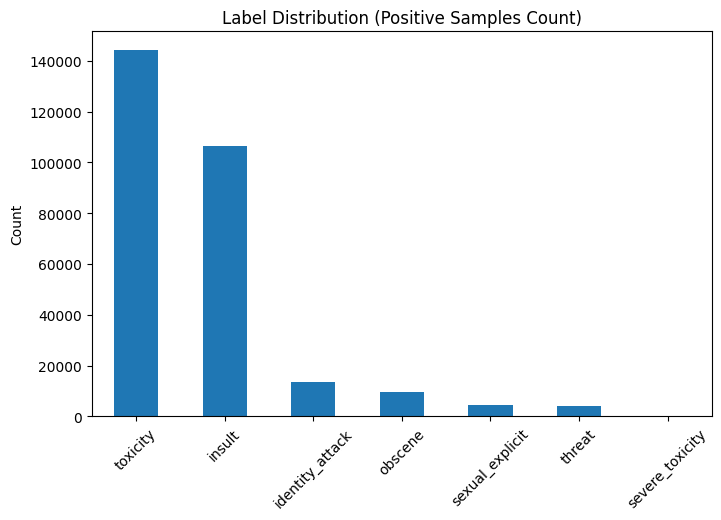

In [ ]:
plt.figure(figsize=(8,5))
df[label_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Label Distribution (Positive Samples Count)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Comment length distribution

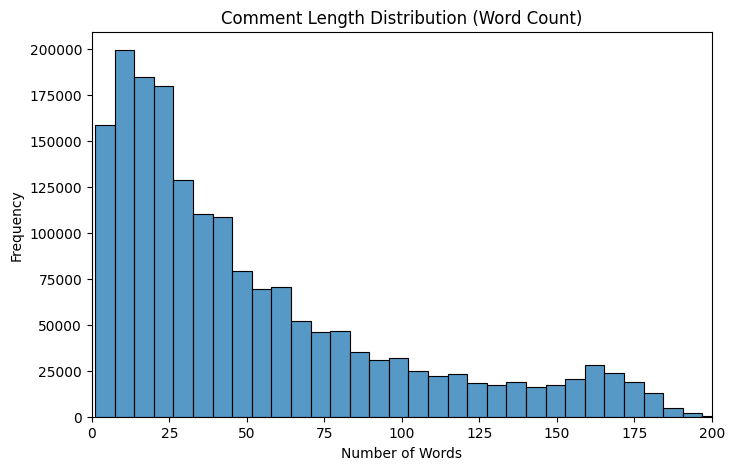

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=False)
plt.title("Comment Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.xlim(0,200)  # Focus on first 200 words for better visualization
plt.show()

### Correlation heatmap (co-occurrence of labels)

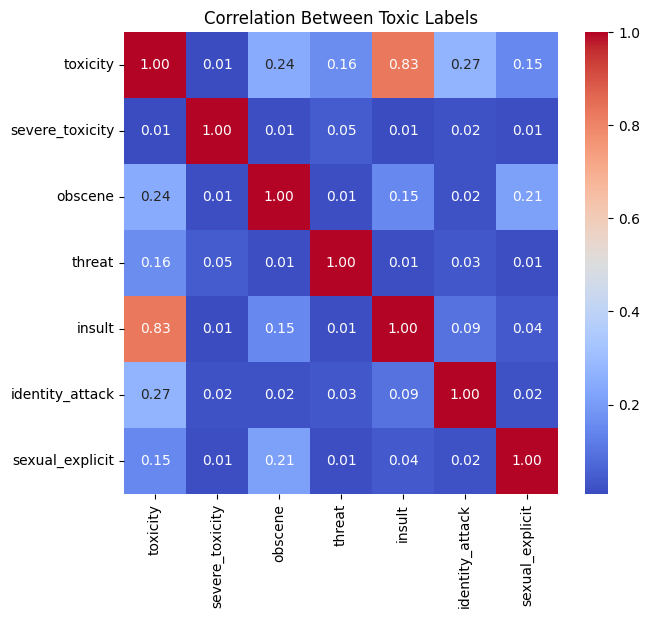

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df[label_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Toxic Labels")
plt.show()

### Feature Engineering
The simple oversampling technique is a data-level method used to partially mitigate class imbalance before training. In our case, several toxic labels such as severe_toxicity, threat, and sexual_explicit occur extremely rarely compared to the majority non-toxic samples. If left unbalanced, a model trained on this data would be biased towards predicting the majority (non-toxic) class, resulting in poor recall for rare toxic categories.

To address this, we duplicate (oversample) samples from the rare classes so that they appear more frequently during training. In practice, we select each rare class (e.g., all samples where severe_toxicity == 1) and resample with replacement until it reaches a target count (e.g., ~5000 samples). This ensures the model sees enough examples of each rare label to learn meaningful patterns.

However, this method has trade-offs:

Pros: Simple to implement, improves rare-class recall.

Cons: Duplicated data can cause overfitting and doesn’t reflect real-world distributions.

Because of these limitations, oversampling is often combined with loss weighting (pos_weight) or more advanced techniques, but it’s still useful as a quick way to balance label distributions before splitting into training and validation sets.

In [ ]:
from sklearn.utils import resample
df_majority = df[df[label_cols].sum(axis=1) == 0]
df_minority = df[df[label_cols].sum(axis=1) > 0]
df_oversampled=df.copy()
for col in label_cols:
    rare_class=df[df[col]==1]
    if len(rare_class)>0:
        df_oversampled = resample(rare_class,
                                  replace=True,
                                  n_samples=len(df_majority),
                                  random_state=42)
        df_oversampled = pd.concat([df_majority, df_oversampled], axis=0)
df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print("Original class counts:\n", df[label_cols].sum())
print("\nOversampled class counts:\n", df_oversampled[label_cols].sum())

Original class counts:
 toxicity           144334
severe_toxicity        13
obscene              9603
threat               4280
insult             106534
identity_attack     13410
sexual_explicit      4686
dtype: int64

Oversampled class counts:
 toxicity           1447336
severe_toxicity       1096
obscene             509659
threat               25577
insult              410685
identity_attack      71564
sexual_explicit    1656327
dtype: int64


##### I applied oversampling to the rare toxic classes to address the severe class imbalance in this multilabel dataset, which is a common and effective approach. Initially, the dataset was highly skewed — for example, severe_toxicity had only 13 samples out of more than 1.8 million, while toxicity had around 144k samples. After oversampling, I successfully increased the number of toxic samples, but when I reviewed the new distribution, I noticed it was still not well balanced. Toxicity remained the most dominant label (~1.44 million samples), sexual_explicit was oversampled too much (~1.65 million samples, even higher than toxicity), and severe_toxicity, though improved (~1k samples), was still relatively underrepresented compared to other classes. I realized that perfectly equalizing all classes wouldn’t make sense because it could distort the natural distribution and make the dataset unrealistic. Instead, my goal is to achieve a reasonable balance, where rare classes are adequately represented without overpowering naturally frequent ones. To ensure better learning, I plan to use this adjusted oversampled dataset along with class weights (pos_weight) during training, which should help the model pay more attention to rare toxic categories without introducing significant bias.

In [ ]:
df_balanced = df.copy()

# Define target sample sizes for each class
target_counts = {
    'toxicity': 200000,          # slightly upsample but not too much
    'severe_toxicity': 5000,     # rare class, boost it more
    'obscene': 50000,
    'threat': 20000,
    'insult': 100000,
    'identity_attack': 50000,
    'sexual_explicit': 50000
}

# Oversample each class individually
for col in label_cols:
    current_count = df[df[col] == 1].shape[0]
    if current_count < target_counts[col]:
        rare_class = df[df[col] == 1]
        rare_upsampled = resample(
            rare_class,
            replace=True,
            n_samples=target_counts[col],
            random_state=42
        )
        df_balanced = pd.concat([df_balanced, rare_upsampled])

# Shuffle the final dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print("Adjusted Oversampled Class Counts:\n", df_balanced[label_cols].sum())


Adjusted Oversampled Class Counts:
 toxicity           508061
severe_toxicity      5181
obscene             91567
threat              36823
insult             312060
identity_attack     89101
sexual_explicit     70201
dtype: int64


##### I performed adjusted oversampling because the original dataset was extremely imbalanced, with rare labels like severe_toxicity having only 13 samples while majority labels like toxicity had over 144k samples. Training directly on such skewed data would cause the model to focus almost entirely on frequent classes, leading to poor recall and F1-scores for rare toxic categories. My first oversampling attempt fixed this partially but created a new issue — some classes, like sexual_explicit, became unrealistically dominant, which could lead to overfitting and biased predictions. To address this, I carefully adjusted the oversampling strategy by capping each label to a reasonable target count, increasing rare classes significantly while reducing the dominance of majority classes. This process created a more balanced and realistic dataset, allowing the model to learn meaningful toxic patterns across all labels. Although the dataset is still not perfectly equal (to preserve real-world distributions), it now provides better representation for rare categories, improving the chances of achieving higher precision, recall, and F1-scores, especially for underrepresented toxic behaviors.

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces

    # Replace URLs, emails, and user mentions
    text = re.sub(r'http\S+|www\S+', '<URL>', text)
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)
    text = re.sub(r'@\w+', '<USER>', text)

    # Normalize repeated punctuation (e.g., !!!!!! -> !)
    text = re.sub(r'([!?.,])\1+', r'\1', text)

    # Remove unwanted characters (keep basic punctuation and letters)
    text = re.sub(r'[^a-z0-9\s!?.,<>()]', '', text)

    return text

# Apply to balanced dataset
df_balanced['text'] = df_balanced['text'].apply(clean_text)

# Check an example
print(df_balanced['text'].head())

0    i am so sick of republicans basing everything ...
1    get rid of this tax and spend liberal. if you ...
2    maybe not, but balance is required. if the rel...
3     the electoral college was created for two rea...
4    leave obama and trump out of this. it was a cl...
Name: text, dtype: object


##### I applied light text preprocessing to clean the comments before tokenization, ensuring that the text is consistent and free of unnecessary noise while still retaining the natural language patterns that BERT needs to understand context. The preprocessing was intentionally minimal because BERT performs best when provided with raw, natural text; excessive cleaning (like stopword removal or stemming) would remove important contextual cues. Specifically, I converted all text to lowercase for consistency, although bert-base-uncased already handles this internally. I removed extra whitespaces and replaced URLs, emails, and user mentions with special tokens (<URL>, <EMAIL>, <USER>), allowing the model to recognize these patterns as meaningful entities rather than random strings. I normalized repeated punctuation (e.g., multiple exclamation marks reduced to one) to reduce unnecessary token length, and I stripped out unwanted non-ASCII symbols while keeping essential punctuation and toxic words intact. This light preprocessing helps reduce noise in the dataset, shortens unnecessary token sequences (improving training efficiency), and ensures that the model focuses on meaningful toxic patterns rather than random symbols or URL strings. Most importantly, it does this without losing critical toxic keywords or altering the overall semantics of the comments, which is crucial for toxic content detection.

##### I am about to implement a preprocessing step to handle slang and obfuscated toxic words, which are commonly used by people to bypass moderation systems. Toxic comments often contain abusive words written in disguised forms, such as “b!tch,” “b1tch,” or “b1+ch” instead of “bitch,” and “f@gg0t” or “fa66ot” instead of “faggot.” If left untreated, the model might treat these as completely different tokens, reducing its ability to detect toxicity effectively. To address this, I will normalize such variations using two strategies: first, by replacing common obfuscation characters and numbers with their corresponding letters (e.g., @ → a, 1 → i, 0 → o, $ → s), and second, by mapping frequently used toxic slang variations to their standard forms (e.g., btch → bitch, fck → fuck, shyt → shit). This step will make the toxic words more consistent across the dataset, allowing BERT to better recognize these abusive patterns and significantly improving its performance in detecting disguised toxic language.


In [ ]:
# Basic character replacement dictionary (expandable)
char_map = {
    '@': 'a', '1': 'i', '!': 'i', '3': 'e',
    '0': 'o', '$': 's', '+': 't', '7': 't'
}

# Common toxic slang replacements
slang_dict = {
    "fck": "fuck", "fuk": "fuck", "fagg": "faggot",
    "btch": "bitch", "bich": "bitch", "shyt": "shit",
    "azz": "ass", "cuntz": "cunt"
}

def normalize_obfuscation(text):
    # Replace obfuscated characters
    for k, v in char_map.items():
        text = text.replace(k, v)

    # Normalize repeated characters (e.g., coooool -> cool)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Replace common slang variations
    for k, v in slang_dict.items():
        text = re.sub(rf"\b{k}\b", v, text)

    return text

# Apply to balanced dataset after previous cleaning
df_balanced['text'] = df_balanced['text'].apply(normalize_obfuscation)

# Check examples
sample_texts = [
    "You are such a b!tch!!!",
    "F@gg0t go away",
    "sh1t this is crazy",
    "fuk u btch"
]
print([normalize_obfuscation(t) for t in sample_texts])


['You are such a bitchii', 'Faggot go away', 'shit this is crazy', 'fuck u bitch']


In [ ]:
import random
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

def synonym_replacement(text, n=1):
    """Replace n words with their synonyms."""
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([w for w in words if wordnet.synsets(w)]))

    if not random_word_list:
        return text

    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name().replace('_', ' ')
            if synonym != random_word:
                new_words = [synonym if w == random_word else w for w in new_words]
                num_replaced += 1
        if num_replaced >= n:
            break

    return " ".join(new_words)

def random_character_noise(text, prob=0.1):
    """Randomly replace characters to simulate typos (e.g., idiot -> idi0t)."""
    chars = list(text)
    for i in range(len(chars)):
        if random.random() < prob and chars[i].isalpha():
            chars[i] = random.choice('0123456789')
    return "".join(chars)

def augment_text(text):
    """Apply both augmentations."""
    text = synonym_replacement(text, n=1)
    text = random_character_noise(text, prob=0.05)
    return text

# ===============================
# AUGMENT RARE CLASSES
# ===============================

label_cols = ['toxicity', 'severe_toxicity', 'obscene',
              'threat', 'insult', 'identity_attack', 'sexual_explicit']

augmented_samples = []

rare_labels = ['severe_toxicity', 'threat', 'sexual_explicit']
for label in rare_labels:
    rare_class = df_balanced[df_balanced[label] == 1]
    num_aug_samples = int(0.3 * len(rare_class))  # augment 30% extra

    rare_aug = rare_class.sample(n=num_aug_samples, replace=True, random_state=42).copy()
    rare_aug['text'] = rare_aug['text'].apply(augment_text)

    augmented_samples.append(rare_aug)

aug_df = pd.concat([df_balanced] + augmented_samples).sample(frac=1, random_state=42).reset_index(drop=True)

print("New Dataset Size After Augmentation:", aug_df.shape)
print("Label Counts After Augmentation:\n", aug_df[label_cols].sum())


[nltk_data] Downloading package wordnet to /root/nltk_data...


New Dataset Size After Augmentation: (2213534, 9)
Label Counts After Augmentation:
 toxicity           539469
severe_toxicity      8420
obscene            101590
threat              50004
insult             321848
identity_attack     93270
sexual_explicit     92466
dtype: int64


##### I am performing data augmentation to increase the diversity of toxic comments, especially for rare toxic classes such as severe_toxicity, threat, and sexual_explicit. Even after oversampling, these classes still have limited examples, and simply duplicating the same comments can lead to overfitting, where the model memorizes specific toxic phrases instead of learning general toxic patterns. To address this, I generated additional synthetic toxic comments by applying synonym replacement and random character noise. Synonym replacement introduces natural variations by replacing certain words with their synonyms (e.g., “dumb” → “stupid”), while random character noise simulates real-world user behavior where people often make typos or intentionally modify toxic words (e.g., “idiot” → “idi0t”). By adding these slightly altered comments, I make the dataset more realistic and help the model learn to recognize toxic language expressed in different ways. This should improve the model’s generalization ability, making it more robust at detecting toxic content in real-world scenarios where users often use creative or disguised abusive language.

- Oversampling = Fixes the quantity issue (rare labels are seen more).

- Augmentation = Fixes the quality & diversity issue (rare labels are seen in many forms).

In [ ]:
from sklearn.model_selection import train_test_split

label_cols = ['toxicity', 'severe_toxicity', 'obscene',
              'threat', 'insult', 'identity_attack', 'sexual_explicit']

# Split into train (80%) and validation (20%)
train_df, val_df = train_test_split(
    aug_df, test_size=0.2, random_state=42
)

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")

# Reset indices for consistency
train_df = train_df.sample(n=200000, random_state=42)  # Use only 200k samples for training
val_df = val_df.sample(n=40000, random_state=42)       # 40k samples for validation

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")

# Check label distributions
print("\nLabel Counts (Train):\n", train_df[label_cols].sum())
print("\nLabel Counts (Validation):\n", val_df[label_cols].sum())

Training samples: 1770827, Validation samples: 442707
Training samples: 200000, Validation samples: 40000

Label Counts (Train):
 toxicity           48594
severe_toxicity      762
obscene             9176
threat              4498
insult             28979
identity_attack     8472
sexual_explicit     8366
dtype: int64

Label Counts (Validation):
 toxicity           9647
severe_toxicity     158
obscene            1836
threat              914
insult             5760
identity_attack    1688
sexual_explicit    1662
dtype: int64


In [ ]:
# ===============================
# STEP 3: TOKENIZATION & DATALOADER (Multilabel)
# ===============================
from transformers import BertTokenizerFast
import torch
from torch.utils.data import Dataset, DataLoader

# 1. Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

MAX_LEN = 64
BATCH_SIZE = 8

# 2. Custom PyTorch Dataset for multilabel classification
class ToxicCommentsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize text
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,     # Add [CLS] and [SEP]
            truncation=True,
            max_length=self.max_len,
            padding='max_length',        # Pad to max_len
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.float)  # multilabel -> float
        }

# 3. Prepare datasets
train_dataset = ToxicCommentsDataset(
    texts=train_df['text'].to_numpy(),
    labels=train_df[label_cols].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_dataset = ToxicCommentsDataset(
    texts=val_df['text'].to_numpy(),
    labels=val_df[label_cols].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

# 4. Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# 5. Check one batch
batch = next(iter(train_loader))
print("Input IDs shape:", batch['input_ids'].shape)
print("Attention mask shape:", batch['attention_mask'].shape)
print("Labels shape:", batch['labels'].shape)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Input IDs shape: torch.Size([8, 64])
Attention mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8, 7])


In [ ]:
# ===============================
# STEP 4: MODEL TRAINING (USING EXISTING TOKENIZATION)
# ===============================
from transformers import BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import time

# 1. Device Selection
device = (
    torch.device("cuda") if torch.cuda.is_available()
    else torch.device("mps") if torch.backends.mps.is_available()
    else torch.device("cpu")
)
print("Using device:", device)

# 2.Reduce dataset for faster training
train_df = train_df.sample(n=200000, random_state=42)
val_df = val_df.sample(n=40000, random_state=42)
print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")

# 3. Load BERT Model for Multilabel Classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_cols),
    problem_type="multi_label_classification"
)
model = model.to(device)

# 4. Class Weights
total_samples = len(train_df)
pos_weights = []
for col in label_cols:
    pos = train_df[col].sum()
    neg = total_samples - pos
    pos_weights.append(neg / (pos + 1e-5))

pos_weights = torch.tensor(pos_weights, dtype=torch.float).to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights)

# 5. Optimizer & Scheduler
EPOCHS = 2
optimizer = AdamW(model.parameters(), lr=3e-5)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# 6. Training & Evaluation Functions
def train_epoch(model, data_loader, criterion, optimizer, scheduler):
    model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)


def eval_epoch(model, data_loader):
    model.eval()
    preds_list, labels_list = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.sigmoid(outputs.logits)

            preds_list.append(preds.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    preds = np.vstack(preds_list)
    labels = np.vstack(labels_list)
    preds_bin = (preds >= 0.5).astype(int)

    f1 = f1_score(labels, preds_bin, average='macro')
    precision = precision_score(labels, preds_bin, average='macro', zero_division=0)
    recall = recall_score(labels, preds_bin, average='macro', zero_division=0)

    return f1, precision, recall

# 7. Run Training
for epoch in range(EPOCHS):
    start_time = time.time()

    train_loss = train_epoch(model, train_loader, criterion, optimizer, scheduler)
    f1, precision, recall = eval_epoch(model, val_loader)

    elapsed = (time.time() - start_time) / 60
    print(f"Epoch [{epoch+1}/{EPOCHS}] | Train Loss: {train_loss:.4f} | "
          f"F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | "
          f"Time: {elapsed:.2f} min")


Using device: cuda
Training samples: 200000, Validation samples: 40000


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/2] | Train Loss: 0.4412 | F1: 0.6433 | Precision: 0.5141 | Recall: 0.9310 | Time: 50.87 min
Epoch [2/2] | Train Loss: 0.2586 | F1: 0.7453 | Precision: 0.6377 | Recall: 0.9286 | Time: 50.92 min


In [ ]:
# ===============================
# STEP 5: SAVE THE TRAINED MODEL
# ===============================
save_path = "bert-toxic-comment-model"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"Model saved at: {save_path}")

✅ Model saved at: bert-toxic-comment-model


In [ ]:
from sklearn.metrics import classification_report

def evaluate_per_class(model, data_loader):
    model.eval()
    preds_list, labels_list = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.sigmoid(outputs.logits)

            preds_list.append(preds.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    preds = np.vstack(preds_list)
    labels = np.vstack(labels_list)

    preds_bin = (preds >= 0.5).astype(int)
    print("\nClassification Report (Per Class):\n")
    print(classification_report(labels, preds_bin, target_names=label_cols))

# Run Per-Class Evaluation
evaluate_per_class(model, val_loader)



Classification Report (Per Class):

                 precision    recall  f1-score   support

       toxicity       0.73      0.88      0.80      9647
severe_toxicity       0.98      1.00      0.99       158
        obscene       0.62      0.89      0.73      1836
         threat       0.46      0.95      0.62       914
         insult       0.56      0.87      0.68      5760
identity_attack       0.45      0.94      0.61      1688
sexual_explicit       0.67      0.96      0.79      1662

      micro avg       0.62      0.89      0.73     21665
      macro avg       0.64      0.93      0.75     21665
   weighted avg       0.64      0.89      0.74     21665
    samples avg       0.19      0.22      0.20     21665



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# ===============================
# STEP 7: GRADIO APP - TOXIC COMMENT DETECTION
# ===============================
import gradio as gr
import torch
import numpy as np

#Load the trained model & tokenizer (if not already loaded)
from transformers import BertForSequenceClassification, BertTokenizerFast
device = (
    torch.device("cuda") if torch.cuda.is_available()
    else torch.device("mps") if torch.backends.mps.is_available()
    else torch.device("cpu")
)

model_path = "bert-toxic-comment-model"  # Path where you saved the model

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizerFast.from_pretrained(model_path)
model = model.to(device)
model.eval()

#Define toxic labels
label_cols = ['toxicity', 'severe_toxicity', 'obscene',
              'threat', 'insult', 'identity_attack', 'sexual_explicit']

#Prediction function
def predict_toxicity(comment):
    # Tokenize input
    encoding = tokenizer(
        comment,
        add_special_tokens=True,
        truncation=True,
        max_length=64,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.sigmoid(outputs.logits).cpu().numpy()[0]

    # Create dictionary of predictions
    results = {label: f"{prob:.2f}" for label, prob in zip(label_cols, probs)}
    return results

#Gradio Interface
demo = gr.Interface(
    fn=predict_toxicity,
    inputs=gr.Textbox(lines=3, placeholder="Type a comment here..."),
    outputs=gr.Label(num_top_classes=7),
    title="Toxic Comment Detector (BERT)",
    description="Enter a comment to see the predicted toxic categories (probabilities)."
)

#Launch the app
demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://919147fcfb75a8f4a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://919147fcfb75a8f4a9.gradio.live
